In [1]:
from data import Dataset
from sc_ged import SC_GED
import numpy as np
import matplotlib.pyplot as plt
from utils import modularity
from sc_sr import SC_SR
from itertools import permutations
from metrics import purity_score, nmi_score, ri_score
%reload_ext autoreload
%autoreload 2

c:\Users\souhm\anaconda3\envs\NewEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


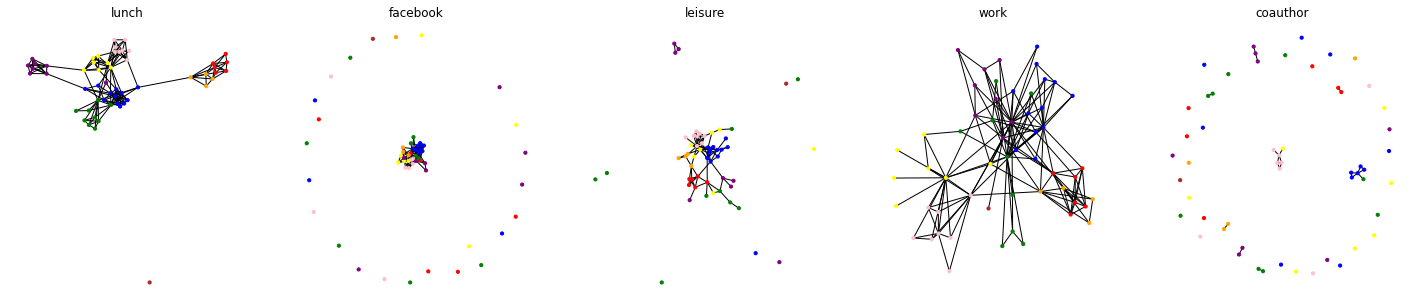

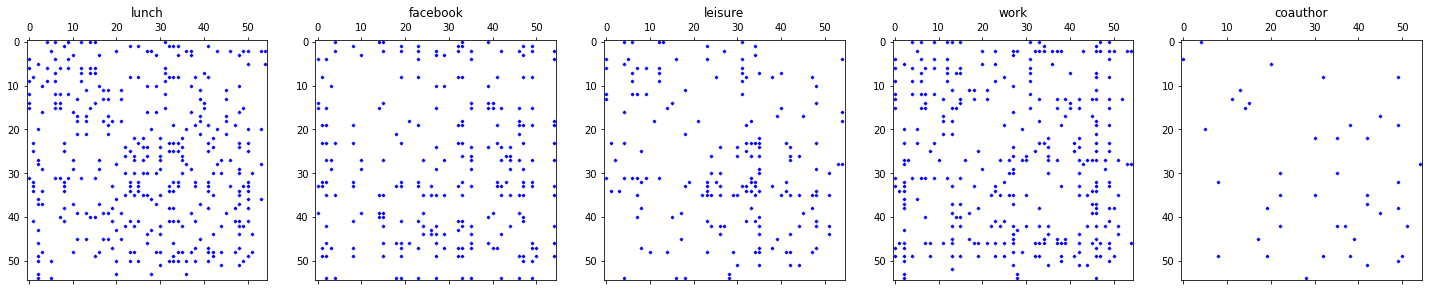

In [2]:
dataset = Dataset("AUCS", preprocess=False)
dataset.display()

In [3]:
W = dataset.MLG
k = np.unique(dataset.labels).shape[0]
_lambda = [1,1,1,1]
true_labels = dataset.labels
ranking = [0, 1, 2, 3, 4]
all_permutations = list(permutations(ranking))

N = len(true_labels)
ground_truth_clustering = {i: true_labels[i] for i in range(N)}

In [7]:
for ranking in all_permutations:
    labels = SC_SR(W, k, _lambda, ranking)
    clustering = {i: labels[i] for i in range(N)}
    purity = purity_score(clustering, ground_truth_clustering)
    nmi = nmi_score(clustering, ground_truth_clustering)
    ri = ri_score(clustering, ground_truth_clustering)
    print("\nRanking",ranking)   
    print("Purity: ", purity)
    print("NMI: ", nmi)
    print("RI: ", ri)


Ranking (0, 1, 2, 3, 4)
Purity:  0.9454545454545454
NMI:  0.909850861577498
RI:  0.9636363636363636

Ranking (0, 1, 2, 4, 3)
Purity:  0.9454545454545454
NMI:  0.9098508615774981
RI:  0.9636363636363636

Ranking (0, 1, 3, 2, 4)
Purity:  0.9272727272727272
NMI:  0.8856342173685211
RI:  0.9575757575757575

Ranking (0, 1, 3, 4, 2)
Purity:  0.9272727272727272
NMI:  0.8856342173685213
RI:  0.9575757575757575

Ranking (0, 1, 4, 2, 3)
Purity:  0.9454545454545454
NMI:  0.909850861577498
RI:  0.9636363636363636

Ranking (0, 1, 4, 3, 2)
Purity:  0.9272727272727272
NMI:  0.8856342173685213
RI:  0.9575757575757575

Ranking (0, 2, 1, 3, 4)
Purity:  0.9090909090909091
NMI:  0.8741584051139587
RI:  0.9528619528619529

Ranking (0, 2, 1, 4, 3)
Purity:  0.9090909090909091
NMI:  0.8741584051139588
RI:  0.9528619528619529

Ranking (0, 2, 3, 1, 4)
Purity:  0.8909090909090909
NMI:  0.8542145727338354
RI:  0.9494949494949495

Ranking (0, 2, 3, 4, 1)
Purity:  0.8909090909090909
NMI:  0.8542145727338354
RI:  0

In [5]:
dataset.labels

[0,
 1,
 2,
 3,
 0,
 2,
 0,
 4,
 1,
 0,
 3,
 5,
 0,
 5,
 4,
 4,
 3,
 5,
 5,
 1,
 2,
 5,
 6,
 1,
 6,
 1,
 6,
 3,
 2,
 3,
 6,
 0,
 1,
 1,
 1,
 6,
 2,
 3,
 1,
 5,
 4,
 1,
 6,
 2,
 6,
 5,
 5,
 1,
 3,
 1,
 2,
 6,
 7,
 2,
 2]